### Title: Jupyter Notebook Exploratory Data Analysis

#### Author: Brett Neely

#### Project Purpose: The taxis dataset is an example dataset from the seaborn package. This notebook explores, analyzes, and visualizes this dataset.

In [84]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 1. Data Acquisition

In [85]:
# Load the dataset
df = sns.load_dataset("taxis")

#### 2. Data Inspection

In [86]:
# Display first 5 rows
print(df.head(5))

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

##### **Observation:** The taxis dataset has detailed information about taxis trips including time traveled, amount of passengers, fare, payment type, etc. From inspecting the first 10 rows and column headings, the trips seem to all take place in New York City.

In [87]:
# Display the data types
print(df.dtypes)

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object


#### 3. Descriptive Statistics

In [88]:
# Display summary statistics for each column
print(df.describe())

                              pickup                        dropoff  \
count                           6433                           6433   
mean   2019-03-16 08:31:28.514223616  2019-03-16 08:45:49.491217408   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:50:34            2019-03-08 16:12:51   
50%              2019-03-15 21:46:58            2019-03-15 22:06:44   
75%              2019-03-23 17:41:38            2019-03-23 17:51:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.00000

In [89]:
# Store aggregation calculations in variables and print their results
avg_fare = round(df["fare"].mean(), 2)
avg_tips = round(df["tip"].mean(), 2)
avg_tolls = round(df["tolls"].mean(), 2)
avg_distance = round(df["distance"].mean(), 2)
total_trips = len(df)

print(f"""There are a total of {total_trips} trips. 
The average fare is {avg_fare}.
The average tip is {avg_tips}.
The average toll cost is {avg_tolls}.
The average trip distance is {avg_distance}.""")

There are a total of 6433 trips. 
The average fare is 13.09.
The average tip is 1.98.
The average toll cost is 0.33.
The average trip distance is 3.02.


#### 4. Data Distribution for Numerical Columns

<Axes: >

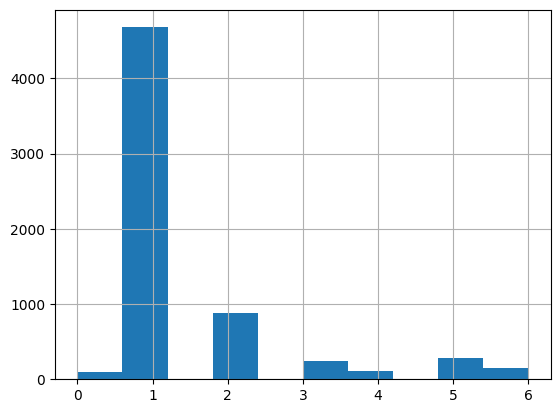

In [90]:
# Plot a historgram for the passengers numerical column
df['passengers'].hist()

#### **Observation:** A large majority of taxi trips had 1 passenger. The most amount of passengers in a taxi ride was 6.

#### 5. Data Distribution for Categorical Columns

In [91]:
# Inspect value counts by categorical column
df['pickup_borough'].value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

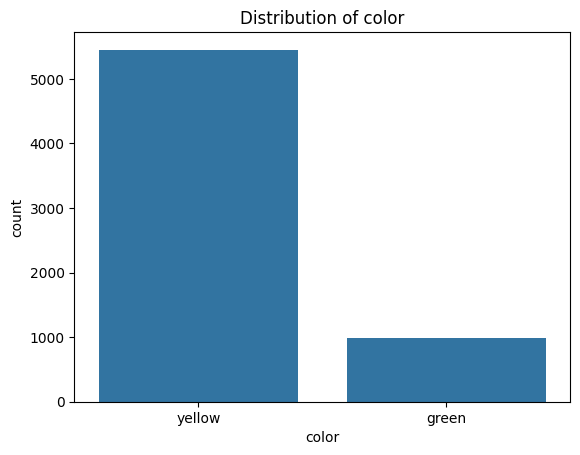

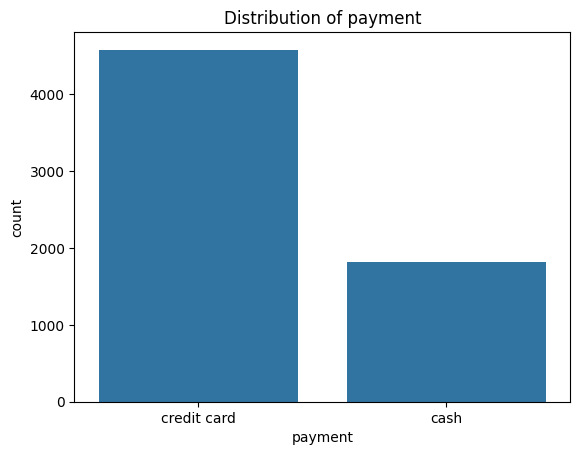

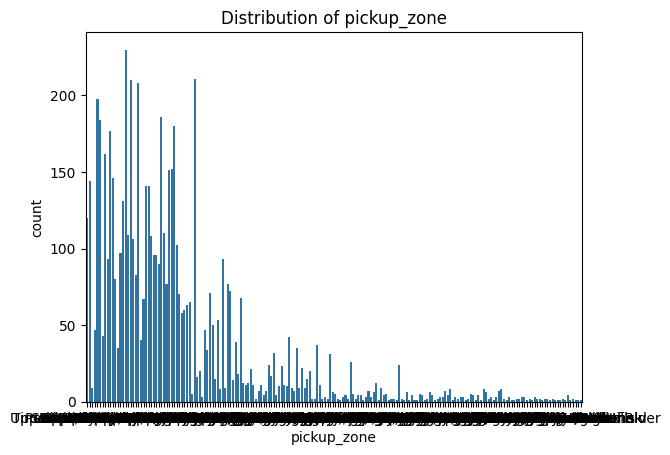

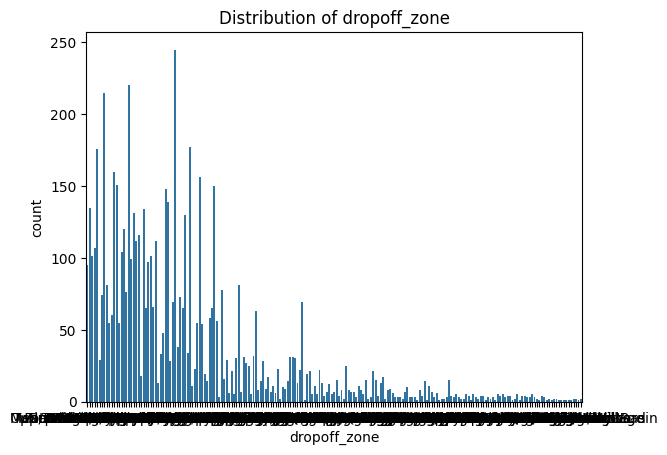

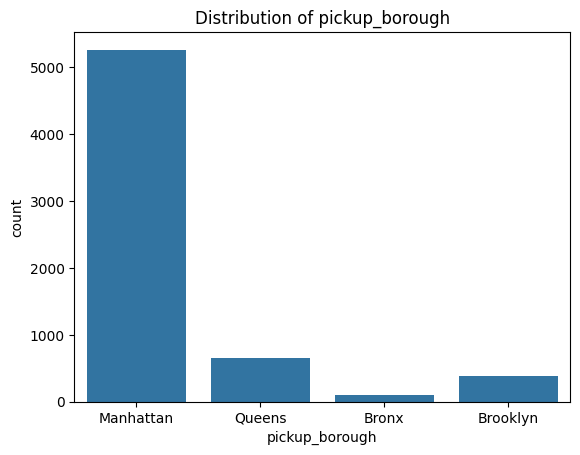

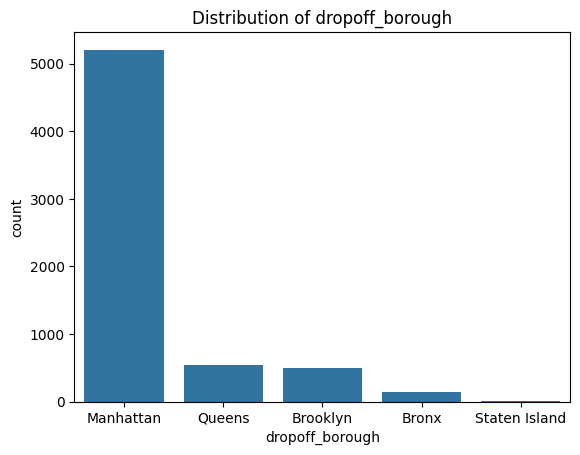

In [92]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

#### **Observation:** The majority of taxi trips had pickup and dropoff locations of Manhattan borough. Most passengers paid with credit card and most taxis were yellow.

#### 6. Data transformation and Feature Engineering

In [93]:
# Create a new dataframe based off the existing dataframe and rename the passengers column to riders
df2 = df.rename(columns={'passengers': 'riders'})

# Create a new column for total trip time in minutes by using the difference between the dropoff and pickup columns
df2['trip_time_minutes'] = (df.dropoff - df.pickup) / pd.Timedelta(minutes=1)

# Create a new column to show the number of passengers divided by the total cost
df2['cost_per_rider'] = df2.total / df2.riders
print(df2.head(5))

               pickup             dropoff  riders  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24       1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00       1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25       1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51       1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14       3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  trip_time_minutes  \
0    UN/Turtle Bay South      Manhattan       Manhattan           6.250000   
1  Upper West 

#### 7. Visualizations

<Axes: >

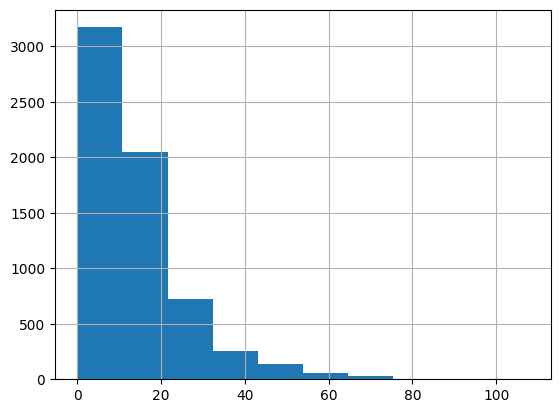

In [94]:
# Display the trip time in a histogram
df2['trip_time_minutes'].hist()

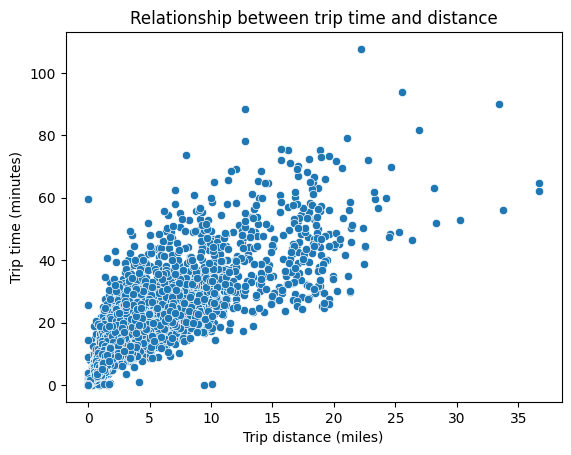

In [95]:
# Display a scatter plot of of trip time and distance
sns.scatterplot(data=df2,x='distance',y='trip_time_minutes')
plt.title('Relationship between trip time and distance')
plt.xlabel('Trip distance (miles)')
plt.ylabel('Trip time (minutes)')
plt.show()

#### **Observation:** The longest trip took over 100 minutes, but wasn't the furthest distance traveled. There were trips that were over 35 miles, but were only completed around 60 minutes.

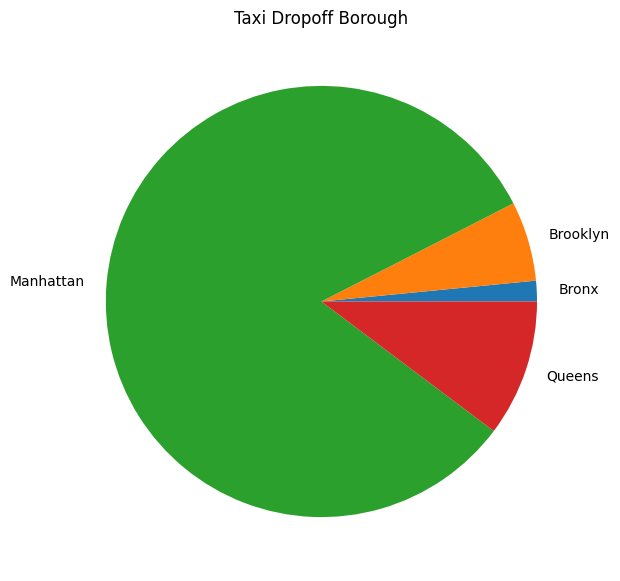

In [96]:
# Visualize the pickup boroughs with a pie chart

df_plot = df2.groupby('pickup_borough').size()
df_plot.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title("Taxi Dropoff Borough")
plt.ylabel("")
plt.show()

#### 8. Story Telling and Presentation

#### **Conclusion:**
This dataset captured the details of 6,433 taxi rides. Based on the above visualizations and calculations the following can be concluded:
- all taxi rides had between 1 to 6 passengers
- the average fare was $13.09, the average tip was $1.98, and the average toll cost was $0.33
- the average trip distance was 3.02 miles; there were 5 trips longer than 30 miles
- most passengers were either being picked up from or drop off in the Manhattan borough
- most passengers paid with a credit card
- mosst taxis were yellow as opposed to green - these were the only two colors of taxis in the dataset